# Task 6.1. Linear image filtering
---
***Author: Piotr Skalski***

## Imports

In [1]:
import numpy as np
import cv2
import os

import display_util

import matplotlib.pyplot as plt
%matplotlib inline

## Settings

In [2]:
SOURCE_DIR = "./../data/"
IMAGE_NAMES = [
    "plansza.bmp",
    "lena.bmp"
]

## Loading images

In [3]:
# building paths to files
file_paths = [os.path.join(SOURCE_DIR, file) for file in IMAGE_NAMES]
# loading files
files = [cv2.imread(path, 0) for path in file_paths]

## Display plansza.bmp

In [4]:
IMAGE = files[0]

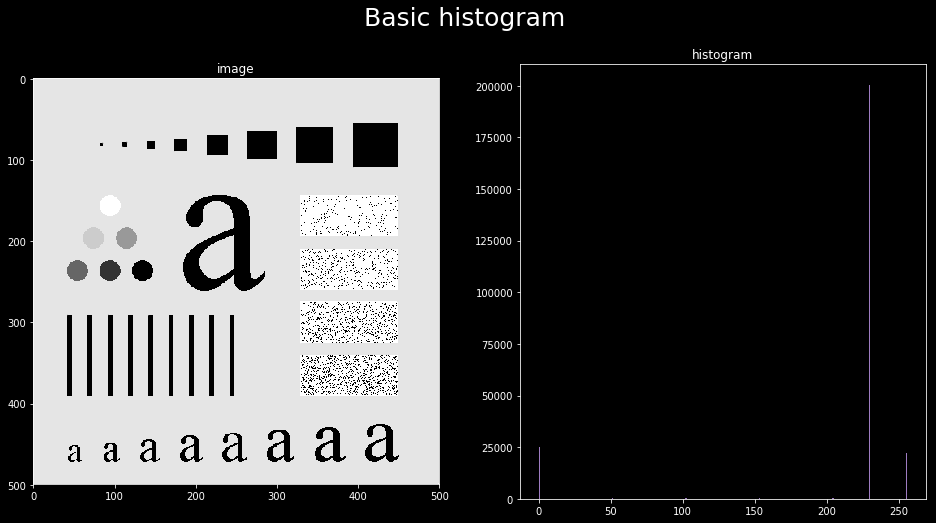

In [5]:
plt.style.use('dark_background')
fig = plt.figure(figsize=(16,8))
fig.suptitle('Basic histogram', fontsize = 25)
ax1 = fig.add_subplot(121)
ax1.imshow(IMAGE, 'gray')
ax1.set_title("image")

ax2 = fig.add_subplot(122)
ax2.hist(IMAGE.ravel(), 256, [0,256], color = '#9E7CC1')
ax2.set_title("histogram")

plt.show()

## Averaging

### Settings

In [6]:
KERNEL_SIZES = [3, 5, 9, 15, 35]
KERNEL_NAMES = ["kernel 3x3", "kernel 5x5", "kernel 9x9", "kernel 15x15", "kernel 35x35"]
KERNELS = [np.ones((kernel_size, kernel_size),np.float32)/(kernel_size**2) for kernel_size in KERNEL_SIZES]
IMAGE = files[0]

### Implementation

In [7]:
output_images_avg = [cv2.filter2D(IMAGE, -1, kernel) for kernel in KERNELS]

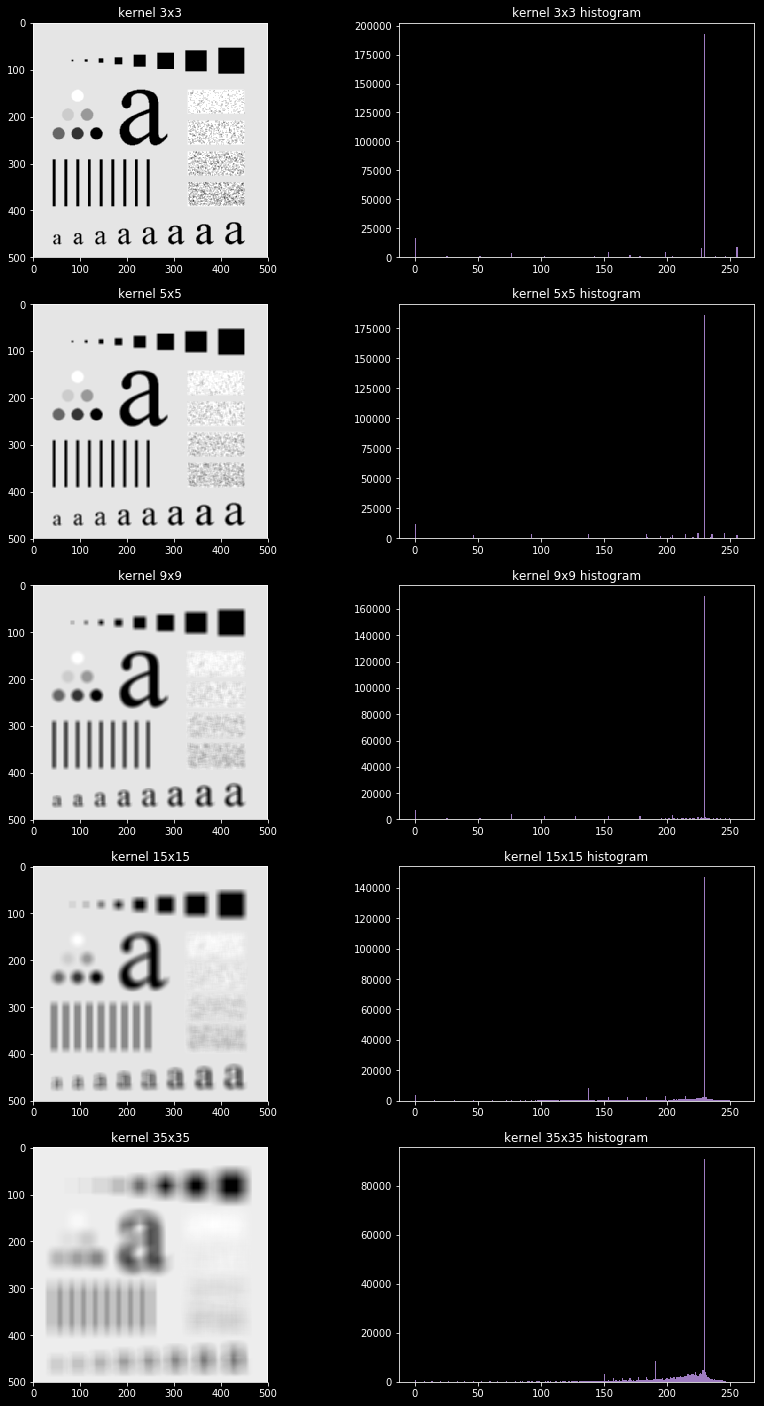

In [8]:
display_util.images_with_histograms(files_list=output_images_avg, names_list=KERNEL_NAMES)

## Absolute value of the image difference

### Settings

In [9]:
INPUT_IMAGE_1 = files[0]
INPUT_IMAGE_2 = output_images_avg[1]

### Implementation

In [10]:
image_diff = np.absolute(np.subtract(INPUT_IMAGE_1, INPUT_IMAGE_2))

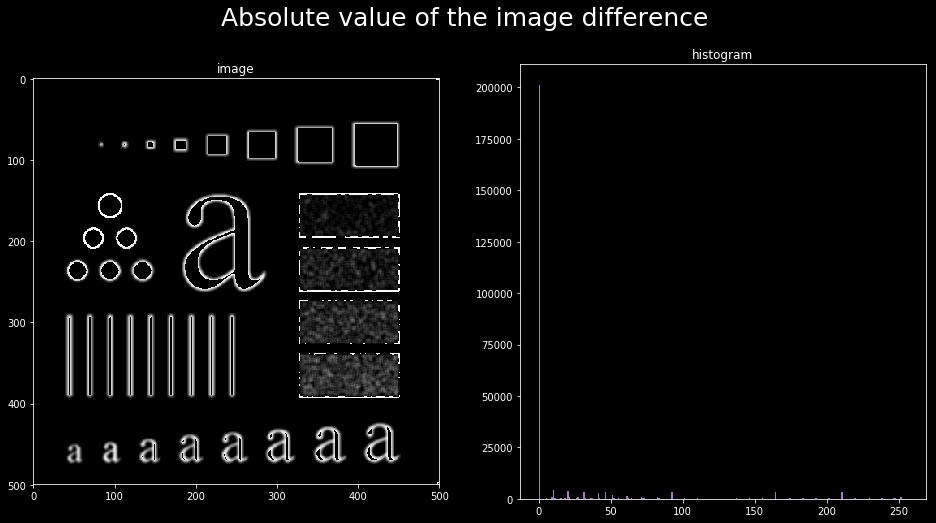

In [11]:
plt.style.use('dark_background')
fig = plt.figure(figsize=(16,8))
fig.suptitle('Absolute value of the image difference', fontsize = 25)
ax1 = fig.add_subplot(121)
ax1.imshow(image_diff, 'gray')
ax1.set_title("image")

ax2 = fig.add_subplot(122)
ax2.hist(image_diff.ravel(), 256, [0,256], color = '#9E7CC1')
ax2.set_title("histogram")

plt.show()

## Filtration with selected mask

### Settings

In [12]:
KERNEL = np.array([
    [1, 2, 1], 
    [2, 4, 2], 
    [1, 2, 1]
])
KERNEL = KERNEL/KERNEL.sum()
IMAGE = files[0]

### Implementation

In [13]:
output_images_mask = cv2.filter2D(IMAGE, -1, KERNEL)

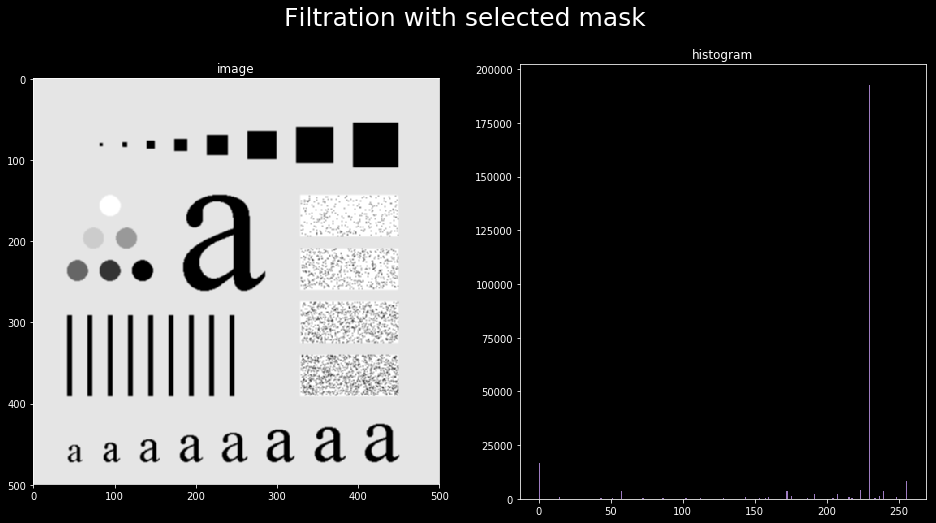

In [14]:
plt.style.use('dark_background')
fig = plt.figure(figsize=(16,8))
fig.suptitle('Filtration with selected mask', fontsize = 25)
ax1 = fig.add_subplot(121)
ax1.imshow(output_images_mask, 'gray')
ax1.set_title("image")

ax2 = fig.add_subplot(122)
ax2.hist(output_images_mask.ravel(), 256, [0,256], color = '#9E7CC1')
ax2.set_title("histogram")

plt.show()

## Visualization of Gauss filters

### Settings

In [15]:
STD_DEV_VALUES = [0.5, 2.5, 5.5, 7.5]
KERNEL_SIZE = 5

### Implementation

In [16]:
gaussian_kernels = [cv2.getGaussianKernel(KERNEL_SIZE, std_dev_val) for std_dev_val in STD_DEV_VALUES]

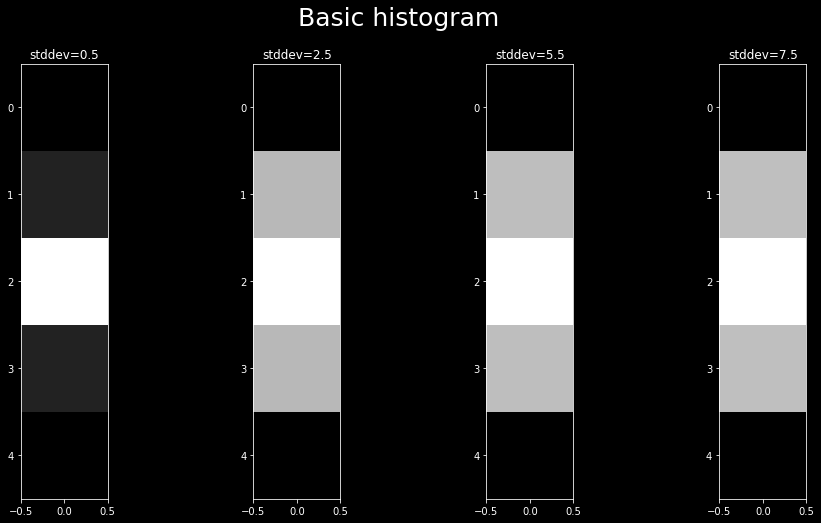

In [17]:
plt.style.use('dark_background')
fig = plt.figure(figsize=(16,8))
fig.suptitle('Basic histogram', fontsize = 25)
ax1 = fig.add_subplot(141)
ax1.imshow(gaussian_kernels[0], 'gray')
ax1.set_title("stddev=0.5")

ax2 = fig.add_subplot(142)
ax2.imshow(gaussian_kernels[1], 'gray')
ax2.set_title("stddev=2.5")

ax3 = fig.add_subplot(143)
ax3.imshow(gaussian_kernels[2], 'gray')
ax3.set_title("stddev=5.5")

ax4 = fig.add_subplot(144)
ax4.imshow(gaussian_kernels[3], 'gray')
ax4.set_title("stddev=7.5")

plt.show()

## Gaussian Blurring

### Settings

In [18]:
STD_DEV_VALUES = [0.5, 2.5, 5.5, 7.5]
KERNEL_NAMES = ["stddev=0.5", "stddev=2.5", "stddev=5.5", "stddev=7.5"]
KERNEL_SIZE = 5
IMAGE = files[0]

In [19]:
output_images_gauss = [cv2.GaussianBlur(IMAGE, (KERNEL_SIZE, KERNEL_SIZE), std_dev_val) for std_dev_val in STD_DEV_VALUES]

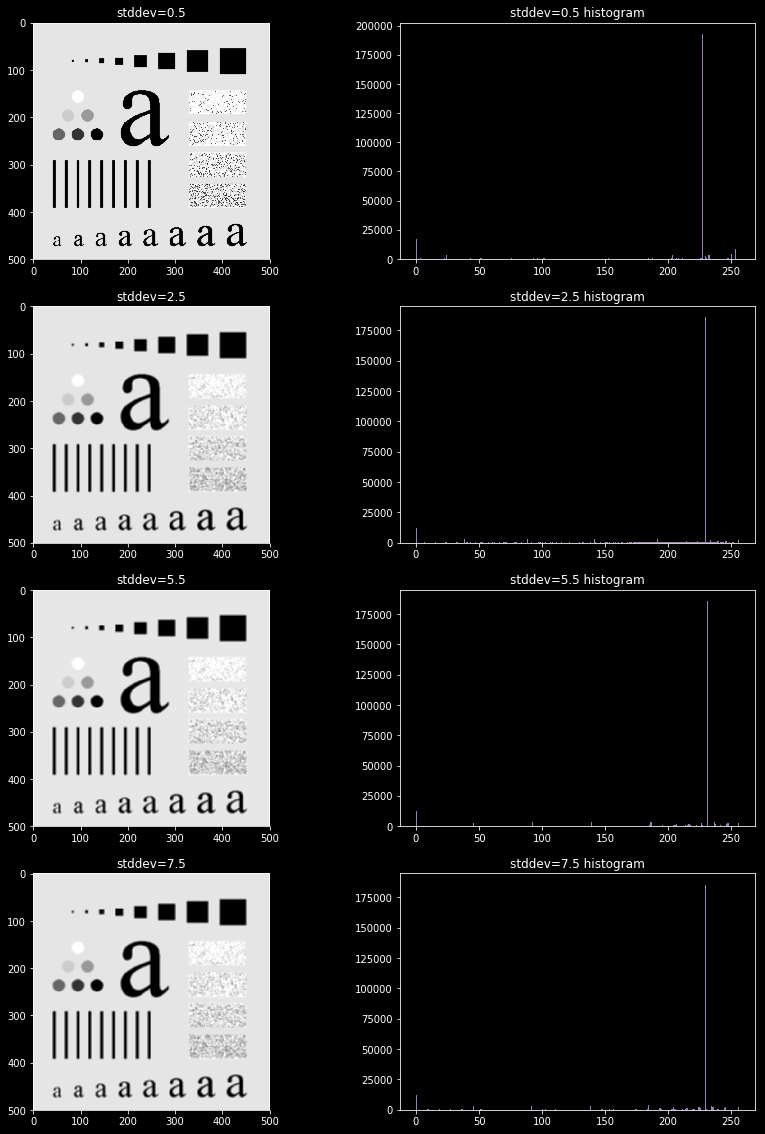

In [20]:
display_util.images_with_histograms(files_list=output_images_gauss, names_list=KERNEL_NAMES)

## Resources

1. [2D Convolution ( Image Filtering )](https://docs.opencv.org/3.4/d4/d13/tutorial_py_filtering.html)